Subajuste y sobreajuste
========

* *30 min* | Última modificación: Julio 09, 2019

Basado en https://www.tensorflow.org/beta/tutorials/keras/overfit_and_underfit

## Preparación

In [1]:
from __future__ import absolute_import, division, print_function

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.0.0-beta1


## Datos

In [2]:
NUM_WORDS = 10000

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

def multi_hot_sequences(sequences, dimension):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0  # set specific indices of results[i] to 1s
    return results


train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)

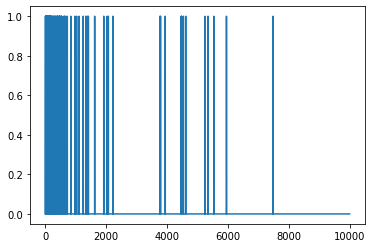

In [3]:
plt.plot(train_data[0]);

## Modelo base

### Especificación del modelo

In [4]:
baseline_model = keras.Sequential([
    # `input_shape` is only required here so that `.summary` works. 
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

baseline_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', 'binary_crossentropy'])

baseline_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


### Entrenamiento

In [5]:
baseline_history = baseline_model.fit(
    train_data,
    train_labels,
    epochs=20,
    batch_size=512,
    validation_data=(test_data, test_labels),
    verbose=2)

W0709 15:59:36.114344 140261028558656 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 4s - loss: 0.4643 - accuracy: 0.8175 - binary_crossentropy: 0.4643 - val_loss: 0.3286 - val_accuracy: 0.8758 - val_binary_crossentropy: 0.3286
Epoch 2/20
25000/25000 - 3s - loss: 0.2429 - accuracy: 0.9121 - binary_crossentropy: 0.2429 - val_loss: 0.2859 - val_accuracy: 0.8868 - val_binary_crossentropy: 0.2859
Epoch 3/20
25000/25000 - 3s - loss: 0.1792 - accuracy: 0.9366 - binary_crossentropy: 0.1792 - val_loss: 0.2942 - val_accuracy: 0.8827 - val_binary_crossentropy: 0.2942
Epoch 4/20
25000/25000 - 3s - loss: 0.1454 - accuracy: 0.9497 - binary_crossentropy: 0.1454 - val_loss: 0.3295 - val_accuracy: 0.8727 - val_binary_crossentropy: 0.3295
Epoch 5/20
25000/25000 - 3s - loss: 0.1195 - accuracy: 0.9599 - binary_crossentropy: 0.1195 - val_loss: 0.3425 - val_accuracy: 0.8736 - val_binary_crossentropy: 0.3425
Epoch 6/20
25000/25000 - 3s - loss: 0.0988 - accuracy: 0.9688 - binary_crossentropy: 0.0988 - val_loss: 0.3747

## Modelo más pequeño

### Especificación del modelo

In [6]:
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(4, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

smaller_model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy', 'binary_crossentropy'])

smaller_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 40004     
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


### Entrenamiento

In [7]:
smaller_history = smaller_model.fit(
    train_data,
    train_labels,
    epochs=20,
    batch_size=512,
    validation_data=(test_data, test_labels),
    verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 3s - loss: 0.6440 - accuracy: 0.6120 - binary_crossentropy: 0.6440 - val_loss: 0.5821 - val_accuracy: 0.6878 - val_binary_crossentropy: 0.5821
Epoch 2/20
25000/25000 - 3s - loss: 0.5285 - accuracy: 0.7952 - binary_crossentropy: 0.5285 - val_loss: 0.5136 - val_accuracy: 0.7932 - val_binary_crossentropy: 0.5136
Epoch 3/20
25000/25000 - 3s - loss: 0.4689 - accuracy: 0.8656 - binary_crossentropy: 0.4689 - val_loss: 0.4819 - val_accuracy: 0.8231 - val_binary_crossentropy: 0.4819
Epoch 4/20
25000/25000 - 3s - loss: 0.4312 - accuracy: 0.8971 - binary_crossentropy: 0.4312 - val_loss: 0.4591 - val_accuracy: 0.8488 - val_binary_crossentropy: 0.4591
Epoch 5/20
25000/25000 - 3s - loss: 0.4020 - accuracy: 0.9146 - binary_crossentropy: 0.4020 - val_loss: 0.4456 - val_accuracy: 0.8568 - val_binary_crossentropy: 0.4456
Epoch 6/20
25000/25000 - 3s - loss: 0.3782 - accuracy: 0.9286 - binary_crossentropy: 0.3782 - val_loss: 0.4316

## Modelo más grande

### Especificación

In [8]:
bigger_model = keras.models.Sequential([
    keras.layers.Dense(512, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

bigger_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy','binary_crossentropy'])

bigger_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               5120512   
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 513       
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________


### Entrenamiento

In [9]:
bigger_history = bigger_model.fit(
    train_data, 
    train_labels,
    epochs=20,
    batch_size=512,
    validation_data=(test_data, test_labels),
    verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 6s - loss: 0.3416 - accuracy: 0.8550 - binary_crossentropy: 0.3416 - val_loss: 0.2999 - val_accuracy: 0.8785 - val_binary_crossentropy: 0.2999
Epoch 2/20
25000/25000 - 6s - loss: 0.1405 - accuracy: 0.9492 - binary_crossentropy: 0.1405 - val_loss: 0.3347 - val_accuracy: 0.8727 - val_binary_crossentropy: 0.3347
Epoch 3/20
25000/25000 - 6s - loss: 0.0438 - accuracy: 0.9879 - binary_crossentropy: 0.0438 - val_loss: 0.4577 - val_accuracy: 0.8686 - val_binary_crossentropy: 0.4577
Epoch 4/20
25000/25000 - 6s - loss: 0.0068 - accuracy: 0.9989 - binary_crossentropy: 0.0068 - val_loss: 0.6141 - val_accuracy: 0.8684 - val_binary_crossentropy: 0.6141
Epoch 5/20
25000/25000 - 7s - loss: 0.0011 - accuracy: 1.0000 - binary_crossentropy: 0.0011 - val_loss: 0.6975 - val_accuracy: 0.8702 - val_binary_crossentropy: 0.6975
Epoch 6/20
25000/25000 - 6s - loss: 4.8094e-04 - accuracy: 1.0000 - binary_crossentropy: 4.8094e-04 - val_loss

## Evolución de la pérdida para los modelos especificados

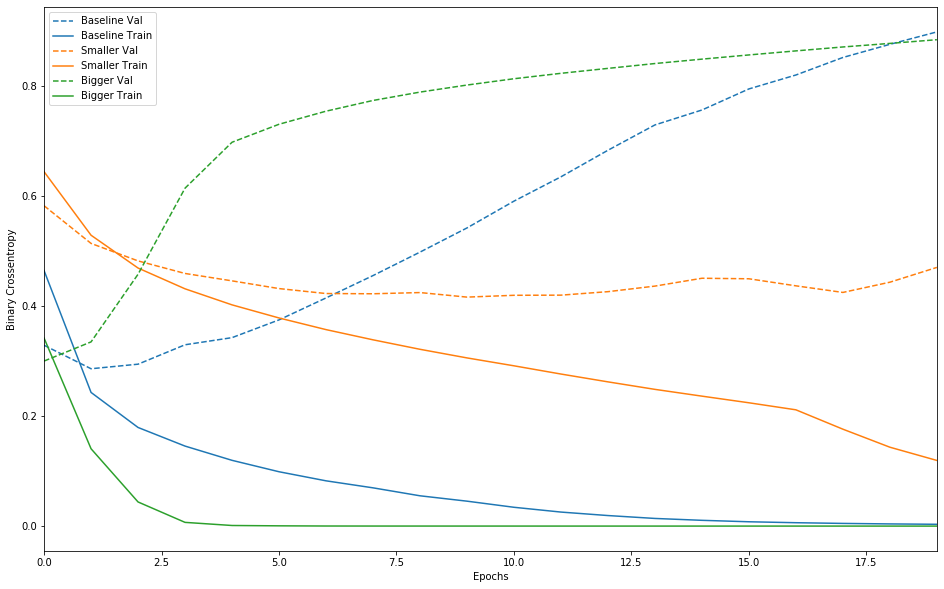

In [10]:
def plot_history(histories, key='binary_crossentropy'):
    
    plt.figure(figsize=(16,10))
    
    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_'+key],
                       '--', label=name.title()+' Val')
        plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_',' ').title())
    plt.legend()

    plt.xlim([0,max(history.epoch)])


plot_history(
    [('baseline', baseline_history),
     ('smaller', smaller_history),
     ('bigger', bigger_history)])

## Estrategías para evitar el sobreajuste

### Regularización L2

In [11]:
l2_model = keras.models.Sequential([
    
    keras.layers.Dense(16, 
                       kernel_regularizer=keras.regularizers.l2(0.001),
                       activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    
    keras.layers.Dense(16, 
                       kernel_regularizer=keras.regularizers.l2(0.001),
                       activation=tf.nn.relu),
    
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

l2_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', 'binary_crossentropy'])

l2_model_history = l2_model.fit(
    train_data, 
    train_labels,
    epochs=20,
    batch_size=512,
    validation_data=(test_data, test_labels),
    verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 3s - loss: 0.5108 - accuracy: 0.8095 - binary_crossentropy: 0.4689 - val_loss: 0.3631 - val_accuracy: 0.8796 - val_binary_crossentropy: 0.3191
Epoch 2/20
25000/25000 - 3s - loss: 0.2908 - accuracy: 0.9114 - binary_crossentropy: 0.2432 - val_loss: 0.3346 - val_accuracy: 0.8871 - val_binary_crossentropy: 0.2844
Epoch 3/20
25000/25000 - 3s - loss: 0.2422 - accuracy: 0.9332 - binary_crossentropy: 0.1899 - val_loss: 0.3397 - val_accuracy: 0.8850 - val_binary_crossentropy: 0.2860
Epoch 4/20
25000/25000 - 3s - loss: 0.2215 - accuracy: 0.9424 - binary_crossentropy: 0.1661 - val_loss: 0.3600 - val_accuracy: 0.8782 - val_binary_crossentropy: 0.3034
Epoch 5/20
25000/25000 - 3s - loss: 0.2062 - accuracy: 0.9501 - binary_crossentropy: 0.1488 - val_loss: 0.3714 - val_accuracy: 0.8768 - val_binary_crossentropy: 0.3131
Epoch 6/20
25000/25000 - 3s - loss: 0.1949 - accuracy: 0.9546 - binary_crossentropy: 0.1357 - val_loss: 0.3852

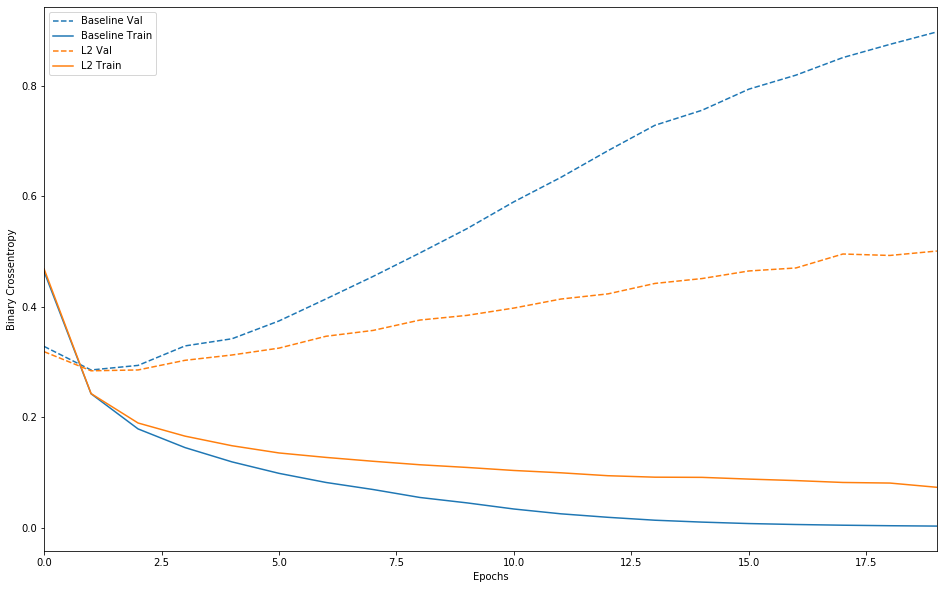

In [12]:
plot_history(
    [('baseline', baseline_history),
     ('l2', l2_model_history)])

### Dropout

In [13]:
dpt_model = keras.models.Sequential([
    
    keras.layers.Dense(16, 
                       activation=tf.nn.relu, 
                       input_shape=(NUM_WORDS,)),
    
    keras.layers.Dropout(0.5),
    
    keras.layers.Dense(16, 
                       activation=tf.nn.relu),
    
    keras.layers.Dropout(0.5),
    
    keras.layers.Dense(1, 
                       activation=tf.nn.sigmoid)
])


dpt_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy','binary_crossentropy'])

dpt_model_history = dpt_model.fit(
    train_data, 
    train_labels,
    epochs=20,
    batch_size=512,
    validation_data=(test_data, test_labels),
    verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 3s - loss: 0.6424 - accuracy: 0.6115 - binary_crossentropy: 0.6424 - val_loss: 0.5321 - val_accuracy: 0.8448 - val_binary_crossentropy: 0.5321
Epoch 2/20
25000/25000 - 3s - loss: 0.4993 - accuracy: 0.7666 - binary_crossentropy: 0.4993 - val_loss: 0.3780 - val_accuracy: 0.8763 - val_binary_crossentropy: 0.3780
Epoch 3/20
25000/25000 - 3s - loss: 0.3860 - accuracy: 0.8433 - binary_crossentropy: 0.3860 - val_loss: 0.3007 - val_accuracy: 0.8855 - val_binary_crossentropy: 0.3007
Epoch 4/20
25000/25000 - 3s - loss: 0.3079 - accuracy: 0.8858 - binary_crossentropy: 0.3079 - val_loss: 0.2752 - val_accuracy: 0.8891 - val_binary_crossentropy: 0.2752
Epoch 5/20
25000/25000 - 3s - loss: 0.2653 - accuracy: 0.9094 - binary_crossentropy: 0.2653 - val_loss: 0.2723 - val_accuracy: 0.8892 - val_binary_crossentropy: 0.2723
Epoch 6/20
25000/25000 - 3s - loss: 0.2302 - accuracy: 0.9240 - binary_crossentropy: 0.2302 - val_loss: 0.2800

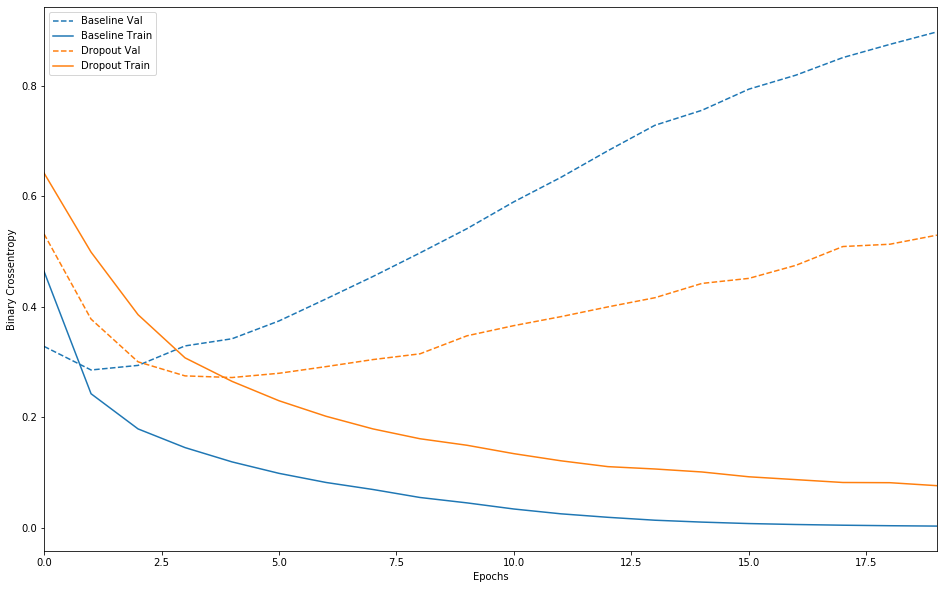

In [14]:
plot_history(
    [('baseline', baseline_history),
     ('dropout', dpt_model_history)]);